## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
import re    
import nltk  
import string 
import warnings

# Read tweets Data

In [6]:

tweet_json=pd.read_json('train_data.json')

In [7]:

s_t= []
s_s = []
time = []
tic= []
for col in tweet_json.records:
    s_t.append(col['stocktwit_tweet']) 
    s_s.append(col['sentiment_score'])
    time.append(pd.to_datetime(col['timestamp']))
    tic.append(col['ticker'])
tweet_json_data = pd.DataFrame({'stocktwit_Tweet':s_t, 
                          'Sentiment_score':s_s,
                          'timestamp':time,
                         'ticker':tic})




In [8]:
tweet_json_data.head(-2)

stocktwit_Tweet  Sentiment_score  \
0        $AMD going up but hesitating however chart is ...                3   
1        @inforlong @MariaGascon Despite\nChina trade w...                3   
2                                               $AVGO WTF?                2   
3        $PH\n New Insider Filing On: \n MULLER KLAUS P...                2   
4        $FB if it bounces tommorrow do the right thing...                3   
...                                                    ...              ...   
1039124  $AAPL I wonder why Guy Adami is always bearish...                2   
1039125  $AMD prepare yourselves for launch. Closing 28...                3   
1039126  $CLF https://twitter.com/hrdrckminer/status/10...                2   
1039127                                           $AMD 🔥🔥🔥                3   
1039128  $FB damn should of shorted 196 after hours to ...                0   

                        timestamp ticker  
0       2018-09-19 18:38:28+00:00   $AMD  
1       2018-10-09 03:51:06+00:00   $CAT  
2       2018-07-12 13:35:32+00:00  $AVGO  
3       2018-07-19 03:32:50+00:00    $PH  
4       2018-08-23 19:07:54+00:00    $FB  
...                           ...    ...  
1039124 2018-09-13 01:24:37+00:00  $AAPL  
1039125 2018-09-04 18:01:16+00:00   $AMD  
1039126 2018-08-13 22:15:04+00:00   $CLF  
1039127 2018-09-04 15:25:59+00:00   $AMD  
1039128 2018-07-25 21:29:03+00:00    $FB  

[1039129 rows x 4 columns]

In [9]:
tweet_json_data.to_csv('tweet_json_data.csv',index=False)


In [10]:
tweet_json_data.head()

stocktwit_Tweet  Sentiment_score  \
0  $AMD going up but hesitating however chart is ...                3   
1  @inforlong @MariaGascon Despite\nChina trade w...                3   
2                                         $AVGO WTF?                2   
3  $PH\n New Insider Filing On: \n MULLER KLAUS P...                2   
4  $FB if it bounces tommorrow do the right thing...                3   

                  timestamp ticker  
0 2018-09-19 18:38:28+00:00   $AMD  
1 2018-10-09 03:51:06+00:00   $CAT  
2 2018-07-12 13:35:32+00:00  $AVGO  
3 2018-07-19 03:32:50+00:00    $PH  
4 2018-08-23 19:07:54+00:00    $FB

# EDA on Tweet data

# Tweet Sentiment Scores distribution

In [12]:
tweet_json_data.Sentiment_score.value_counts()

2    464402
3    208031
4    153905
1    120771
0     92022
Name: Sentiment_score, dtype: int64

In [13]:
tweet_json_data.shape

(1039131, 4)

## Each tweet word counts

In [14]:
countwords = []

In [15]:
len(countwords)

0

In [16]:
len(tweet_json_data['stocktwit_Tweet'])

1039131

In [17]:
for row in tweet_json_data['stocktwit_Tweet']:
    str(row)
    res = len(re.findall(r'\w+', row))
    countwords.append(str(res))
    
    

In [18]:
tweet_json_data['wordcount']=countwords

In [19]:
tweet_json_data.shape

(1039131, 5)

In [20]:
tweet_json_data.head()

stocktwit_Tweet  Sentiment_score  \
0  $AMD going up but hesitating however chart is ...                3   
1  @inforlong @MariaGascon Despite\nChina trade w...                3   
2                                         $AVGO WTF?                2   
3  $PH\n New Insider Filing On: \n MULLER KLAUS P...                2   
4  $FB if it bounces tommorrow do the right thing...                3   

                  timestamp ticker wordcount  
0 2018-09-19 18:38:28+00:00   $AMD        13  
1 2018-10-09 03:51:06+00:00   $CAT        10  
2 2018-07-12 13:35:32+00:00  $AVGO         2  
3 2018-07-19 03:32:50+00:00    $PH        17  
4 2018-08-23 19:07:54+00:00    $FB        11

## Each tweet @ mentions count

In [21]:
count_mentions=[]

In [22]:
for row in tweet_json_data['stocktwit_Tweet']:
    str(row)
    res = len(re.findall(r'@\w+', row))
    count_mentions.append(str(res))

In [23]:
tweet_json_data['mentions_count']=count_mentions

In [24]:
tweet_json_data.shape

(1039131, 6)

In [25]:
tweet_json_data.head(2)

stocktwit_Tweet  Sentiment_score  \
0  $AMD going up but hesitating however chart is ...                3   
1  @inforlong @MariaGascon Despite\nChina trade w...                3   

                  timestamp ticker wordcount mentions_count  
0 2018-09-19 18:38:28+00:00   $AMD        13              0  
1 2018-10-09 03:51:06+00:00   $CAT        10              2

## Each tweet hashtag counts

In [26]:
count_hastags=[]

In [27]:
for row in tweet_json_data['stocktwit_Tweet']:
    str(row)
    res = len(re.findall(r'#\w+', row))
    count_hastags.append(str(res))

In [28]:
tweet_json_data['hashtag_counts']=count_hastags

In [29]:
tweet_json_data.head(-20)

stocktwit_Tweet  Sentiment_score  \
0        $AMD going up but hesitating however chart is ...                3   
1        @inforlong @MariaGascon Despite\nChina trade w...                3   
2                                               $AVGO WTF?                2   
3        $PH\n New Insider Filing On: \n MULLER KLAUS P...                2   
4        $FB if it bounces tommorrow do the right thing...                3   
...                                                    ...              ...   
1039106                 $FB Facebook is GREEN!!!!!! yay!!!                4   
1039107  Today&#39;s insight on $CLF https://app.season...                2   
1039108  $AMD day off... overwatch all day or day tradi...                2   
1039109  $AMD how about another retailer?  Yep, still P...                3   
1039110     $CHK   @notwill \nWhat color does Alisa like ?                2   

                        timestamp ticker wordcount mentions_count  \
0       2018-09-19 18:38:28+00:00   $AMD        13              0   
1       2018-10-09 03:51:06+00:00   $CAT        10              2   
2       2018-07-12 13:35:32+00:00  $AVGO         2              0   
3       2018-07-19 03:32:50+00:00    $PH        17              0   
4       2018-08-23 19:07:54+00:00    $FB        11              0   
...                           ...    ...       ...            ...   
1039106 2018-09-07 18:52:21+00:00    $FB         5              0   
1039107 2018-07-23 11:36:17+00:00   $CLF        13              0   
1039108 2018-09-24 12:24:25+00:00   $AMD        12              0   
1039109 2018-08-03 18:14:54+00:00   $AMD         8              0   
1039110 2018-07-26 17:43:17+00:00   $CHK         7              1   

        hashtag_counts  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
1039106              0  
1039107              1  
1039108              0  
1039109              0  
1039110              0  

[1039111 rows x 7 columns]

## Each tweet Question/Exclamation counts

In [30]:
count_question_exclamation=[]

In [31]:


for row in tweet_json_data['stocktwit_Tweet']:
    str(row)
    res = len(re.findall(r'!|\?', row))
    count_question_exclamation.append(str(res))




In [32]:
tweet_json_data['excl_quest_marks']=count_question_exclamation


In [33]:
tweet_json_data.head(-20)

stocktwit_Tweet  Sentiment_score  \
0        $AMD going up but hesitating however chart is ...                3   
1        @inforlong @MariaGascon Despite\nChina trade w...                3   
2                                               $AVGO WTF?                2   
3        $PH\n New Insider Filing On: \n MULLER KLAUS P...                2   
4        $FB if it bounces tommorrow do the right thing...                3   
...                                                    ...              ...   
1039106                 $FB Facebook is GREEN!!!!!! yay!!!                4   
1039107  Today&#39;s insight on $CLF https://app.season...                2   
1039108  $AMD day off... overwatch all day or day tradi...                2   
1039109  $AMD how about another retailer?  Yep, still P...                3   
1039110     $CHK   @notwill \nWhat color does Alisa like ?                2   

                        timestamp ticker wordcount mentions_count  \
0       2018-09-19 18:38:28+00:00   $AMD        13              0   
1       2018-10-09 03:51:06+00:00   $CAT        10              2   
2       2018-07-12 13:35:32+00:00  $AVGO         2              0   
3       2018-07-19 03:32:50+00:00    $PH        17              0   
4       2018-08-23 19:07:54+00:00    $FB        11              0   
...                           ...    ...       ...            ...   
1039106 2018-09-07 18:52:21+00:00    $FB         5              0   
1039107 2018-07-23 11:36:17+00:00   $CLF        13              0   
1039108 2018-09-24 12:24:25+00:00   $AMD        12              0   
1039109 2018-08-03 18:14:54+00:00   $AMD         8              0   
1039110 2018-07-26 17:43:17+00:00   $CHK         7              1   

        hashtag_counts excl_quest_marks  
0                    0                0  
1                    0                0  
2                    0                1  
3                    0                0  
4                    0                0  
...                ...              ...  
1039106              0                9  
1039107              1                0  
1039108              0                0  
1039109              0                1  
1039110              0                1  

[1039111 rows x 8 columns]

## Each tweet URL counts

In [34]:
count_urls=[]

In [35]:
for row in tweet_json_data['stocktwit_Tweet']:
    str(row)
    res = len(re.findall(r'http.?://[^\s]+[\s]?', row))
    count_urls.append(str(res))

In [36]:
tweet_json_data['url_counts']=count_urls

In [37]:
tweet_json_data.head()

stocktwit_Tweet  Sentiment_score  \
0  $AMD going up but hesitating however chart is ...                3   
1  @inforlong @MariaGascon Despite\nChina trade w...                3   
2                                         $AVGO WTF?                2   
3  $PH\n New Insider Filing On: \n MULLER KLAUS P...                2   
4  $FB if it bounces tommorrow do the right thing...                3   

                  timestamp ticker wordcount mentions_count hashtag_counts  \
0 2018-09-19 18:38:28+00:00   $AMD        13              0              0   
1 2018-10-09 03:51:06+00:00   $CAT        10              2              0   
2 2018-07-12 13:35:32+00:00  $AVGO         2              0              0   
3 2018-07-19 03:32:50+00:00    $PH        17              0              0   
4 2018-08-23 19:07:54+00:00    $FB        11              0              0   

  excl_quest_marks url_counts  
0                0          0  
1                0          0  
2                1          0  
3                0          1  
4                0          0

## Demojizing the emojis

In [38]:
import emoji

In [39]:
count_emojis=[]

In [40]:
for row in tweet_json_data['stocktwit_Tweet']:
    row1= str(emoji.demojize(row))
    res = len(re.findall(r':[a-z_&]+:', row1))
    count_emojis.append(str(res))


In [41]:
tweet_json_data['Emojis_Count']=count_emojis

In [42]:
tweet_json_data.head(-2)

stocktwit_Tweet  Sentiment_score  \
0        $AMD going up but hesitating however chart is ...                3   
1        @inforlong @MariaGascon Despite\nChina trade w...                3   
2                                               $AVGO WTF?                2   
3        $PH\n New Insider Filing On: \n MULLER KLAUS P...                2   
4        $FB if it bounces tommorrow do the right thing...                3   
...                                                    ...              ...   
1039124  $AAPL I wonder why Guy Adami is always bearish...                2   
1039125  $AMD prepare yourselves for launch. Closing 28...                3   
1039126  $CLF https://twitter.com/hrdrckminer/status/10...                2   
1039127                                           $AMD 🔥🔥🔥                3   
1039128  $FB damn should of shorted 196 after hours to ...                0   

                        timestamp ticker wordcount mentions_count  \
0       2018-09-19 18:38:28+00:00   $AMD        13              0   
1       2018-10-09 03:51:06+00:00   $CAT        10              2   
2       2018-07-12 13:35:32+00:00  $AVGO         2              0   
3       2018-07-19 03:32:50+00:00    $PH        17              0   
4       2018-08-23 19:07:54+00:00    $FB        11              0   
...                           ...    ...       ...            ...   
1039124 2018-09-13 01:24:37+00:00  $AAPL        25              0   
1039125 2018-09-04 18:01:16+00:00   $AMD         8              0   
1039126 2018-08-13 22:15:04+00:00   $CLF         9              0   
1039127 2018-09-04 15:25:59+00:00   $AMD         1              0   
1039128 2018-07-25 21:29:03+00:00    $FB        11              0   

        hashtag_counts excl_quest_marks url_counts Emojis_Count  
0                    0                0          0            0  
1                    0                0          0            1  
2                    0                1          0            0  
3                    0                0          1            0  
4                    0                0          0            0  
...                ...              ...        ...          ...  
1039124              0                4          0            1  
1039125              0                0          0            0  
1039126              0                1          1            0  
1039127              0                0          0            3  
1039128              0                0          0            0  

[1039129 rows x 10 columns]

In [43]:
def show_dist(tweet_json_data, col):
    print('Descriptive stats for {}'.format(col))
    print('-'*(len(col)+220))
    print(tweet_json_data.groupby('Sentiment_score')[col].describe())
    
    bins = np.arange(int(tweet_json_data[col].min()), int(tweet_json_data[col].max())+1)
    g = sns.FacetGrid(tweet_json_data, col='Sentiment_score', size=100, hue='Sentiment_score', palette="PuBuGn_d")
    
    
    g = g.map(sns.distplot, col, kde=False, norm_hist=True, bins=bins  )
   

    plt.show()

In [44]:
show_dist(tweet_json_data, 'wordcount')

Descriptive stats for wordcount
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                  count unique top   freq
Sentiment_score                          
0                 92022     57  24   4936
1                120771     63  21   5817
2                464402     79  23  28211
3                208031     66   7  10073
4                153905     55   6   8483


In [45]:

show_dist(tweet_json_data, 'mentions_count')

Descriptive stats for mentions_count
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                  count unique top    freq
Sentiment_score                           
0                 92022     10   0   86696
1                120771     11   0  112246
2                464402     11   0  447636
3                208031     11   0  201733
4                153905     11   0  149564


In [46]:

show_dist(tweet_json_data, 'hashtag_counts')

Descriptive stats for hashtag_counts
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                  count unique top    freq
Sentiment_score                           
0                 92022      9   0   81912
1                120771     11   0  104536
2                464402     10   0  401603
3                208031     12   0  177595
4                153905     11   0  132449


In [47]:

show_dist(tweet_json_data, 'excl_quest_marks')

Descriptive stats for excl_quest_marks
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                  count unique top    freq
Sentiment_score                           
0                 92022     40   0   65829
1                120771     30   0   85092
2                464402     49   0  324023
3                208031     47   0  154672
4                153905     42   0  112845


In [48]:
show_dist(tweet_json_data, 'url_counts')

Descriptive stats for url_counts
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                  count unique top    freq
Sentiment_score                           
0                 92022      3   0   75038
1                120771      4   0   87261
2                464402      6   0  298992
3                208031      6   0  176289
4                153905      4   0  133690


In [49]:
show_dist(tweet_json_data, 'Emojis_Count')

Descriptive stats for Emojis_Count
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                  count unique top    freq
Sentiment_score                           
0                 92022     27   0   88776
1                120771     32   0  116816
2                464402     57   0  447084
3                208031     48   0  197372
4                153905     40   0  147380


## Tweets Counts wrt to Sentiment_Score

#### Evaluating the sentiment scores wrt to tweets

In [50]:
tweet_json_data[tweet_json_data['Sentiment_score']==0]['stocktwit_Tweet'][:3]

5                   $FB as usual......RED  \nevery day.
17    $mu mms took out the SLs, yet it still won&#39...
25                      $MSFT short the high. easy flip
Name: stocktwit_Tweet, dtype: object

In [51]:
tweet_json_data[tweet_json_data['Sentiment_score']==4]['stocktwit_Tweet'][:3]

7       $NOC let&#39;s see when we can hit 310
16                            $AMD buying more
22    $MU doesn’t miss MU Long Rally (Bullish)
Name: stocktwit_Tweet, dtype: object

#### Conclusion

#### Based on above, sentiment score 0 is considered as negative and 4 is considered as positive

### Negative tweets

In [52]:
tweet_json_data[tweet_json_data['Sentiment_score']==0]

stocktwit_Tweet  Sentiment_score  \
5                      $FB as usual......RED  \nevery day.                0   
17       $mu mms took out the SLs, yet it still won&#39...                0   
25                         $MSFT short the high. easy flip                0   
31       $NFLX Astonishing crash for NFLX by late next ...                0   
37       $MU It is the best time to leave within 15 min...                0   
...                                                    ...              ...   
1039063  $AMD \n\nBears I’m waiting for 20-22$ u promis...                0   
1039097  #Update(15)  $TXT Aug-17 65 Puts Down -29%. 0....                0   
1039100  $GE October 30th Tuesday 7:30am is doomsday  !...                0   
1039128  $FB damn should of shorted 196 after hours to ...                0   
1039129                          $AMD back to the 31&#39;s                0   

                        timestamp ticker wordcount mentions_count  \
5       2018-08-02 11:40:49+00:00    $FB         6              0   
17      2018-09-05 14:23:16+00:00    $mu        16              0   
25      2018-07-12 18:13:49+00:00  $MSFT         6              0   
31      2018-10-07 02:53:29+00:00  $NFLX        17              0   
37      2018-07-04 20:35:58+00:00    $MU        29              0   
...                           ...    ...       ...            ...   
1039063 2018-10-11 12:31:45+00:00   $AMD        11              0   
1039097 2018-07-25 18:52:30+00:00   $TXT        23              0   
1039100 2018-10-25 15:43:56+00:00    $GE        10              0   
1039128 2018-07-25 21:29:03+00:00    $FB        11              0   
1039129 2018-09-28 16:19:55+00:00   $AMD         7              0   

        hashtag_counts excl_quest_marks url_counts Emojis_Count  
5                    0                0          0            0  
17                   1                0          0            0  
25                   0                0          0            0  
31                   0                0          0            0  
37                   0                0          0            0  
...                ...              ...        ...          ...  
1039063              0                0          0            0  
1039097              1                0          0            0  
1039100              0                2          0            0  
1039128              0                0          0            0  
1039129              1                0          0            0  

[92022 rows x 10 columns]

### Sentiment score 1 tweets

In [53]:
tweet_json_data[tweet_json_data['Sentiment_score']==1]

stocktwit_Tweet  Sentiment_score  \
20       $MU you all know that when it drops in one day...                1   
24       $NFLX Looks like this resistance will be broke...                1   
29                                     $GE going red today                1   
33       $FB For my stupid fb bull friends, hehehe,   \...                1   
39       $AMD analysts on Estimize expect 7.61% YoY gro...                1   
...                                                    ...              ...   
1039047  $JPM analysts on Estimize are expecting 33.24%...                1   
1039051                              $HES still 6$ to high                1   
1039070              $CHK oil back down....couldnt hold 70                1   
1039083  Kroger SVP Calvin Kaufman Sells $288,435.00 in...                1   
1039118                                       $AMD CRUSHED                1   

                        timestamp ticker wordcount mentions_count  \
20      2018-09-06 19:32:52+00:00    $MU        22              0   
24      2018-09-26 16:34:10+00:00  $NFLX        14              0   
29      2018-07-20 11:14:35+00:00    $GE         4              0   
33      2018-07-26 13:19:12+00:00    $FB        26              0   
39      2018-09-06 12:36:09+00:00   $AMD        47              0   
...                           ...    ...       ...            ...   
1039047 2018-07-03 17:00:15+00:00   $JPM        43              0   
1039051 2018-07-11 18:20:09+00:00   $HES         5              0   
1039070 2018-08-30 13:37:18+00:00   $CHK         7              0   
1039083 2018-10-11 22:24:19+00:00    $KR        16              0   
1039118 2018-10-25 01:17:24+00:00   $AMD         2              0   

        hashtag_counts excl_quest_marks url_counts Emojis_Count  
20                   0                0          0            0  
24                   0                0          0            0  
29                   0                0          0            0  
33                   1                0          0            0  
39                   0                1          1            0  
...                ...              ...        ...          ...  
1039047              0                1          1            0  
1039051              0                0          0            0  
1039070              0                0          0            0  
1039083              0                0          1            0  
1039118              0                0          0            0  

[120771 rows x 10 columns]

### Neutral tweets

In [54]:
tweet_json_data[tweet_json_data['Sentiment_score']==2]

stocktwit_Tweet  Sentiment_score  \
2                                               $AVGO WTF?                2   
3        $PH\n New Insider Filing On: \n MULLER KLAUS P...                2   
6        $AET UnitedHealth Group Goes Ex-Dividend Today...                2   
8        @InCyD3R @Ferrabi I bet you’re also the one sa...                2   
9                                   $AMD Pastor the Stooge                2   
...                                                    ...              ...   
1039119  $AMZN $15 raise happened recently, so not much...                2   
1039122  $PRU 56.8m ago: SEC Current event(s) report - ...                2   
1039124  $AAPL I wonder why Guy Adami is always bearish...                2   
1039126  $CLF https://twitter.com/hrdrckminer/status/10...                2   
1039130                    $AMZN Lagging other tech today.                2   

                        timestamp ticker wordcount mentions_count  \
2       2018-07-12 13:35:32+00:00  $AVGO         2              0   
3       2018-07-19 03:32:50+00:00    $PH        17              0   
6       2018-09-07 15:01:06+00:00   $AET        20              0   
8       2018-10-28 01:19:27+00:00  $AMZN        15              2   
9       2018-08-17 13:35:00+00:00   $AMD         4              0   
...                           ...    ...       ...            ...   
1039119 2018-10-19 20:31:15+00:00  $AMZN        26              0   
1039122 2018-09-26 21:14:06+00:00   $PRU        27              0   
1039124 2018-09-13 01:24:37+00:00  $AAPL        25              0   
1039126 2018-08-13 22:15:04+00:00   $CLF         9              0   
1039130 2018-07-05 17:14:00+00:00  $AMZN         5              0   

        hashtag_counts excl_quest_marks url_counts Emojis_Count  
2                    0                1          0            0  
3                    0                0          1            0  
6                    0                1          1            0  
8                    0                0          0            0  
9                    0                0          0            0  
...                ...              ...        ...          ...  
1039119              0                0          0            0  
1039122              0                0          1            0  
1039124              0                4          0            1  
1039126              0                1          1            0  
1039130              0                0          0            0  

[464402 rows x 10 columns]

### Sentiment score 3 tweets

In [55]:
tweet_json_data[tweet_json_data['Sentiment_score']==3]

stocktwit_Tweet  Sentiment_score  \
0        $AMD going up but hesitating however chart is ...                3   
1        @inforlong @MariaGascon Despite\nChina trade w...                3   
4        $FB if it bounces tommorrow do the right thing...                3   
19       $MU 5 min chart you can see Where the long ter...                3   
36                  $AMD Good luck to everyone that holds.                3   
...                                                    ...              ...   
1039114  Altria Group (MO) announces earnings. $1.08 EP...                3   
1039120                     $MSFT this your entrance point                3   
1039123  $AMD don’t even play, y’all know it’s gapping ...                3   
1039125  $AMD prepare yourselves for launch. Closing 28...                3   
1039127                                           $AMD 🔥🔥🔥                3   

                        timestamp ticker wordcount mentions_count  \
0       2018-09-19 18:38:28+00:00   $AMD        13              0   
1       2018-10-09 03:51:06+00:00   $CAT        10              2   
4       2018-08-23 19:07:54+00:00    $FB        11              0   
19      2018-08-09 14:09:52+00:00    $MU        19              0   
36      2018-10-24 19:52:13+00:00   $AMD         7              0   
...                           ...    ...       ...            ...   
1039114 2018-10-27 17:02:54+00:00    $MO        24              0   
1039120 2018-09-19 18:03:43+00:00  $MSFT         5              0   
1039123 2018-09-14 19:36:39+00:00   $AMD        13              0   
1039125 2018-09-04 18:01:16+00:00   $AMD         8              0   
1039127 2018-09-04 15:25:59+00:00   $AMD         1              0   

        hashtag_counts excl_quest_marks url_counts Emojis_Count  
0                    0                0          0            0  
1                    0                0          0            1  
4                    0                0          0            0  
19                   0                0          0            0  
36                   0                0          0            0  
...                ...              ...        ...          ...  
1039114              0                1          1            0  
1039120              0                0          0            0  
1039123              0                0          0            3  
1039125              0                0          0            0  
1039127              0                0          0            3  

[208031 rows x 10 columns]

### Positive tweets

In [56]:
tweet_json_data[tweet_json_data['Sentiment_score']==4]

stocktwit_Tweet  Sentiment_score  \
7                   $NOC let&#39;s see when we can hit 310                4   
16                                        $AMD buying more                4   
22                $MU doesn’t miss MU Long Rally (Bullish)                4   
26                                     $AMZN $3000 Target,                4   
42       #Update(4)  $COST Jul-27 220 Calls Up +25%.  1...                4   
...                                                    ...              ...   
1039087  $FB right at weekly UTL support. Lets see if i...                4   
1039091  $AMD what a run i bought some calls not sure i...                4   
1039106                 $FB Facebook is GREEN!!!!!! yay!!!                4   
1039116  $ISRG outperforms 92% of all stocks! https://w...                4   
1039121  $AMD INVERTED HAMMER 3rd time is a charm !!!  ...                4   

                        timestamp ticker wordcount mentions_count  \
7       2018-09-12 20:48:40+00:00   $NOC        10              0   
16      2018-09-18 15:45:22+00:00   $AMD         3              0   
22      2018-07-24 08:53:28+00:00    $MU         8              0   
26      2018-09-04 14:12:54+00:00  $AMZN         3              0   
42      2018-07-24 13:50:53+00:00  $COST        26              0   
...                           ...    ...       ...            ...   
1039087 2018-09-07 04:51:32+00:00    $FB        12              0   
1039091 2018-07-26 17:26:14+00:00   $AMD        24              0   
1039106 2018-09-07 18:52:21+00:00    $FB         5              0   
1039116 2018-10-18 11:54:58+00:00  $ISRG        30              0   
1039121 2018-07-22 17:05:38+00:00   $AMD        17              0   

        hashtag_counts excl_quest_marks url_counts Emojis_Count  
7                    1                0          0            0  
16                   0                0          0            0  
22                   0                0          0            0  
26                   0                0          0            0  
42                   1                0          0            0  
...                ...              ...        ...          ...  
1039087              0                0          0            0  
1039091              0                0          0            0  
1039106              0                9          0            0  
1039116              0                3          1            0  
1039121              0                9          0            0  

[153905 rows x 10 columns]

In [57]:
sns.countplot(tweet_json_data['Sentiment_score'])
sns.set(rc={"figure.figsize":(20,10)})

 Highest tweets having sentimet score of 2

## unique ticker counts in tweets 

In [ ]:
tweets_ticker = set(tweet_json_data['ticker'].unique()
print("Number of Unique tickers in tweets_ticker: ",len(tweets_ticker))

## Positive tickers

In [62]:
postivetickers = list(tweet_json_data.loc[tweet_json_data['Sentiment_score'] == 4, 'ticker'].unique())

In [63]:
postivetickersdf=pd.DataFrame(postivetickers)

In [64]:
postivetickersdf.shape

(927, 1)

In [65]:
tweet_json_data[tweet_json_data['Sentiment_score']==4].shape

(153905, 10)

#### Insights
#### 927 tickers are positively mentioned in 153905 tweets 

## Negative tickers

In [66]:
negativetickers = list(tweet_json_data.loc[tweet_json_data['Sentiment_score'] == 0, 'ticker'].unique())

In [67]:
negativetickersdf=pd.DataFrame(negativetickers)

In [68]:
negativetickersdf.shape

(764, 1)

In [69]:
tweet_json_data[tweet_json_data['Sentiment_score']==0].shape

(92022, 10)

#### Insights
####  764 tickers are negatively mentioned in 92022 tweets 

## Neutral tickers

In [70]:
neutraltickers = list(tweet_json_data.loc[tweet_json_data['Sentiment_score'] == 2, 'ticker'].unique())

In [71]:
neutraltickersdf=pd.DataFrame(neutraltickers)

In [72]:
neutraltickersdf.shape

(1847, 1)

In [73]:
tweet_json_data[tweet_json_data['Sentiment_score']==2].shape

(464402, 10)

In [74]:
neutraltickersdf.head()

0
0  $AVGO
1    $PH
2   $AET
3  $AMZN
4   $AMD

#### Insights
####  1847 tickers are neutrally mentioned in 464402 tweets 

### Checking the duplicate tweets

In [75]:
tweet_json_data['stocktwit_Tweet'].duplicated(keep=False).sum() #all the values

106236

In [76]:

tweet_json_data['stocktwit_Tweet'].duplicated().sum() # consider first as valid and remaining as duplicates

79523

## Timestamp Analysis of tweets

In [77]:
tweet_json_data['timestamp'] = tweet_json_data['timestamp'].apply(pd.Timestamp)

In [78]:
tweet_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039131 entries, 0 to 1039130
Data columns (total 10 columns):
stocktwit_Tweet     1039131 non-null object
Sentiment_score     1039131 non-null int64
timestamp           1039131 non-null datetime64[ns, UTC]
ticker              1039131 non-null object
wordcount           1039131 non-null object
mentions_count      1039131 non-null object
hashtag_counts      1039131 non-null object
excl_quest_marks    1039131 non-null object
url_counts          1039131 non-null object
Emojis_Count        1039131 non-null object
dtypes: datetime64[ns, UTC](1), int64(1), object(8)
memory usage: 79.3+ MB


In [79]:
tweet_json_data['timestamp'].dt.year.unique()

array([2018])

In [80]:
tweet_json_data['timestamp'].dt.month.unique()

array([ 9, 10,  7,  8])

In [81]:
sns.countplot(tweet_json_data['timestamp'].dt.month)
sns.set(rc={"figure.figsize":(6,6.2)})

### All the tweet samples are collected from between JULY to OCTOBER month

In [389]:
emptytweets1_test = tweet_json_testdata[['stocktwit_Tweet','ticker']].apply(lambda row: (len(row['stocktwit_Tweet'])-len(row['ticker']) ==0), axis=1)


In [390]:
emptytweets_test = tweet_json_testdata[emptytweets1_test]

In [391]:
emptytweets_test.head()

stocktwit_Tweet                 timestamp ticker tidy_Tweet
55             $RHT 2018-09-19 20:03:46+00:00   $RHT       $RHT
117           $AMZN 2018-09-06 20:15:58+00:00  $AMZN      $AMZN
181           $PYPL 2018-10-18 20:18:03+00:00  $PYPL      $PYPL
230           $AAPL 2018-08-20 05:49:49+00:00  $AAPL      $AAPL
250            $AMD 2018-09-10 14:35:45+00:00   $AMD       $AMD

## Tweet count per Ticker

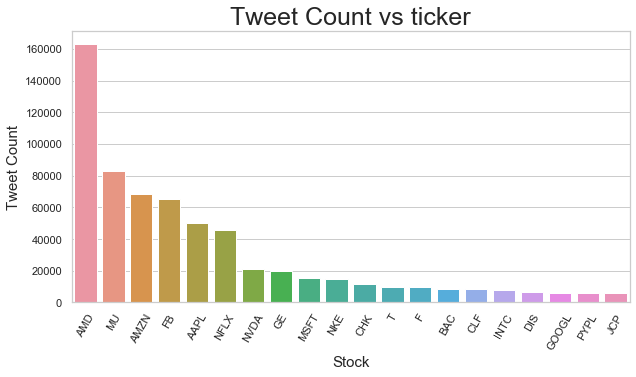

In [139]:
topctweets = tweet_json_data.groupby('ticker')[['tidy_Tweet']].count()
topctweets=topctweets.reset_index()
topctweets=topctweets.sort_values('tidy_Tweet',ascending=False)
topctweets.columns=["ticker","Number of Tweets"]
plt.figure(figsize = (10,5))
sns.barplot(x='ticker',y="Number of Tweets", data=topctweets.head(20))
plt.title('Tweet Count vs ticker', size = 25) 
plt.xlabel('Stock',size = 15)
plt.ylabel('Tweet Count',size = 15)
plt.xticks(rotation=60);

In [140]:
topctweets = tweet_json_data.groupby('ticker')[['Sentiment_score']].count()
topctweets=topctweets.reset_index()
topctweets=topctweets.sort_values('Sentiment_score',ascending=False)
topctweets.columns=["ticker","Sentiment_score"]
plt.figure(figsize = (10,5))
sns.barplot(x='ticker',y="Sentiment_score", data=topctweets.head(20))
plt.title('Sentiment_score Count vs ticker', size = 25) 
plt.xlabel('Ticker',size = 15)
plt.ylabel('Sentiment_score',size = 15)
plt.xticks(rotation=60);

## Tidy_Tweet Word Cloud

In [144]:
all_words = ' '.join([text for text in tweet_json_data['tidy_Tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Tickers Word Cloud

In [145]:
all_words = ' '.join([text for text in tweet_json_data['ticker']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()